In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyzbar

Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing the opencv (cv2)for computer vision , numpy ,decode function from pyzbar library that helps in decoding the qr codes
import cv2
import numpy as np 
from pyzbar.pyzbar import decode

In [2]:
# Import necessary libraries
import cv2
import numpy as np
from pyzbar.pyzbar import decode

# Enable webcam using OpenCV
cap = cv2.VideoCapture(0)

# Set the width and height of the webcam
cap.set(3, 640)
cap.set(4, 480)

# Open the text data file containing authorized codes where all the data that should be authorized can be added
with open('name.txt') as f:
    myDataList = f.read().splitlines()

# Continuous loop for capturing and processing webcam frames
while True:
    # Read a frame from the webcam
    success, img = cap.read()

    # Iterate through detected barcodes in the frame
    for barcode in decode(img):
        # Decode the data from the barcode from byte to strings
        myData = barcode.data.decode('utf-8')
        print(myData)

        # Check if the decoded data is authorized
        if myData in myDataList:
            myOutput = 'Authorized'
            myColor = (0, 255, 0)  # Green for authorized
        else:
            myOutput = 'Un-Authorized'
            myColor = (0, 0, 255)  # Red for unauthorized

        # Draw a polygon around the detected barcode
        pts = np.array([barcode.polygon], np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(img, [pts], True, myColor, 5)

        # Get the rectangle coordinates of the detected barcode
        pts2 = barcode.rect

        # Display authorization status near the barcode
        cv2.putText(img, myOutput, (pts2[0], pts2[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.9, myColor, 2)

        # Display the decoded data below the barcode
        cv2.putText(img, myData, (pts2[0], pts2[2]), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the processed frame with barcode information
    cv2.imshow('Scanner', img)

    # Exit the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        # Release the webcam and break out of the loop
        cap.release()
        break


Sample output<br>
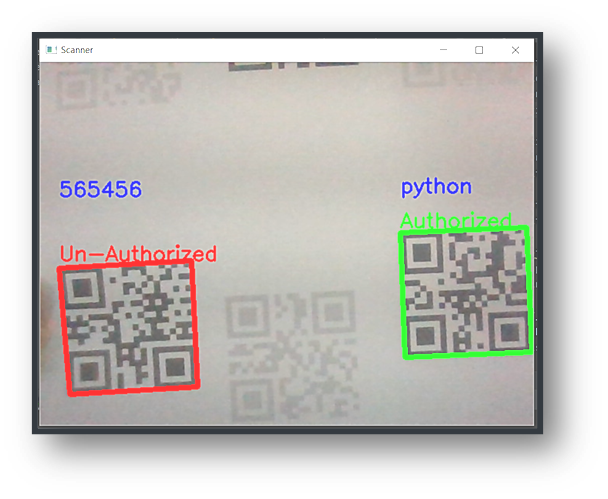